In [ ]:
import pandas as pd

# Load the Excel file
file_path = '/content/Dataset.xlsx'
xls = pd.ExcelFile(file_path)

# Check sheet names to understand the structure of the file
xls.sheet_names


['Sheet1']

In [ ]:
# Load the data from the first sheet
df = pd.read_excel(xls, sheet_name='Sheet1')

# Display the first few rows to understand the dataset's structure
df.head()


,Timestamp,Do you consent to participate in this survey? Link to the consent forms available in both English & Bengali.,Gender,Age,Division in Bangladesh you are based in:,Occupation:,Monthly income range:,How active are you on social media?,How frequently do you engage in purchasing various items across different types on social media platforms?,How much of your monthly income you spend on purchases on social media?,...,"ATTD3: Prominent keywords, such as, ""promotion"" and ""discount"" on social media attract my attention to seek more information about a product.",ATTD4: I have purchased products advertised on social media.,SN1: My family has influence over my purchasing habits through social media marketing.,SN2: People around me think that I should purchase products through social media.,SN3: I feel good if many people purchased products through social media.,SN4: My friends encourage me to purchase products through social media.,PBC1: Frequent advertisement of a product on social media often motivates me to purchase it.,PBC2: I will choose social media as a reference channel for purchasing in the future.,PBC3: I will recommend social media channels to my friends to make purchasing decisions.,PBC4: I will recommend social media channels to my family members to make purchasing decisions.
0,2024-03-09 19:35:00,Yes,Male,23,Dhaka,Student,"BDT 25,001- BDT 50,000",3,3,5-10%,...,4,5,2,3,3,4,4,5,5,4
1,2024-03-10 23:31:00,Yes,Male,25,Chattogram,Unemployed,"Less than BDT 25,000",3,2,5-10%,...,5,2,2,2,3,2,2,2,2,2
2,2024-03-10 23:56:00,Yes,Male,24,Dhaka,Student,"BDT 25,001- BDT 50,000",2,2,10-20%,...,4,3,2,2,3,3,1,2,3,3
3,2024-03-12 23:10:00,Yes,Female,35,Barishal,Employee,"More than BDT 150,001",2,1,Less than 5%,...,3,2,1,3,2,3,2,3,2,2
4,2024-03-13 00:42:00,Yes,Female,33,Barishal,Employee,"More than BDT 150,001",2,2,10-20%,...,4,5,3,4,4,4,3,3,2,2


In [ ]:
# First, let's check for any missing values and other issues like duplicated rows
df_cleaned = df.copy()

# Check for missing values in each column
missing_values = df_cleaned.isnull().sum()

# Check for duplicates
duplicates = df_cleaned.duplicated().sum()

# Checking the data types of each column
data_types = df_cleaned.dtypes

missing_values, duplicates, data_types


(Timestamp                                                                                                                                        0
 Do you consent to participate in this survey? Link to the consent forms available in both English & Bengali.                                     0
 Gender                                                                                                                                           0
 Age                                                                                                                                              0
 Division in Bangladesh you are based in:                                                                                                         0
 Occupation:                                                                                                                                      0
 Monthly income range:                                                                                          

In [ ]:
# Step 1: Clean column names by stripping any leading/trailing spaces and replacing spaces with underscores
df_cleaned.columns = df_cleaned.columns.str.strip().str.replace(' ', '_')

# Step 2: Convert 'Timestamp' column to datetime format
df_cleaned['Timestamp'] = pd.to_datetime(df_cleaned['Timestamp'], errors='coerce')

# Check for any inconsistencies in categorical columns like 'Gender', 'Occupation', 'Division in Bangladesh', etc.
# We can standardize these by converting to lowercase (if necessary) or correcting any potential inconsistencies.
df_cleaned['Gender'] = df_cleaned['Gender'].str.strip().str.lower()
df_cleaned['Occupation'] = df_cleaned['Occupation:'].str.strip().str.lower()
df_cleaned['Division_in_Bangladesh_you_are_based_in:'] = df_cleaned['Division_in_Bangladesh_you_are_based_in:'].str.strip().str.lower()

# Display the cleaned dataset (first few rows)
# Instead of using 'ace_tools', we can use the display function from IPython.display
from IPython.display import display
display(df_cleaned)

df_cleaned.head()


,Timestamp,Do_you_consent_to_participate_in_this_survey?_Link_to_the_consent_forms_available_in_both_English_&_Bengali.,Gender,Age,Division_in_Bangladesh_you_are_based_in:,Occupation:,Monthly_income_range:,How_active_are_you_on_social_media?,How_frequently_do_you_engage_in_purchasing_various_items_across_different_types_on_social_media_platforms?,How_much_of_your_monthly_income_you_spend_on_purchases_on_social_media?,...,ATTD4:__I_have_purchased_products_advertised_on_social_media.,SN1:_My_family_has_influence_over_my_purchasing_habits_through_social_media_marketing.,SN2:_People_around_me_think_that_I_should_purchase_products_through_social_media.,SN3:_I_feel_good_if_many_people_purchased_products_through_social_media.,SN4:_My_friends_encourage_me_to_purchase_products_through_social_media.,PBC1:_Frequent_advertisement_of_a_product_on_social_media_often_motivates_me_to_purchase_it.,PBC2:_I_will_choose_social_media_as_a_reference_channel_for_purchasing_in_the_future.,PBC3:_I_will_recommend_social_media_channels_to_my_friends_to_make_purchasing_decisions.,PBC4:_I_will_recommend_social_media_channels_to_my_family_members_to_make_purchasing_decisions.,Occupation
0,2024-03-09 19:35:00,Yes,male,23,dhaka,Student,"BDT 25,001- BDT 50,000",3,3,5-10%,...,5,2,3,3,4,4,5,5,4,student
1,2024-03-10 23:31:00,Yes,male,25,chattogram,Unemployed,"Less than BDT 25,000",3,2,5-10%,...,2,2,2,3,2,2,2,2,2,unemployed
2,2024-03-10 23:56:00,Yes,male,24,dhaka,Student,"BDT 25,001- BDT 50,000",2,2,10-20%,...,3,2,2,3,3,1,2,3,3,student
3,2024-03-12 23:10:00,Yes,female,35,barishal,Employee,"More than BDT 150,001",2,1,Less than 5%,...,2,1,3,2,3,2,3,2,2,employee
4,2024-03-13 00:42:00,Yes,female,33,barishal,Employee,"More than BDT 150,001",2,2,10-20%,...,5,3,4,4,4,3,3,2,2,employee
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,2024-05-15 19:01:00,Yes,female,21,dhaka,Student,"Less than BDT 25,000",3,1,Less than 5%,...,4,1,4,3,3,4,2,3,2,student
262,2024-05-15 21:51:00,Yes,male,21,dhaka,Student,"BDT 25,001- BDT 50,000",3,1,Less than 5%,...,5,3,3,3,4,2,3,3,3,student
263,2024-05-16 15:12:00,Yes,male,23,dhaka,Student,"Less than BDT 25,000",3,1,Less than 5%,...,5,1,2,3,1,3,3,3,3,student
264,2024-05-17 09:24:00,Yes,male,25,khulna,Student,"Less than BDT 25,000",2,1,Less than 5%,...,4,3,4,4,4,3,4,4,4,student


,Timestamp,Do_you_consent_to_participate_in_this_survey?_Link_to_the_consent_forms_available_in_both_English_&_Bengali.,Gender,Age,Division_in_Bangladesh_you_are_based_in:,Occupation:,Monthly_income_range:,How_active_are_you_on_social_media?,How_frequently_do_you_engage_in_purchasing_various_items_across_different_types_on_social_media_platforms?,How_much_of_your_monthly_income_you_spend_on_purchases_on_social_media?,...,ATTD4:__I_have_purchased_products_advertised_on_social_media.,SN1:_My_family_has_influence_over_my_purchasing_habits_through_social_media_marketing.,SN2:_People_around_me_think_that_I_should_purchase_products_through_social_media.,SN3:_I_feel_good_if_many_people_purchased_products_through_social_media.,SN4:_My_friends_encourage_me_to_purchase_products_through_social_media.,PBC1:_Frequent_advertisement_of_a_product_on_social_media_often_motivates_me_to_purchase_it.,PBC2:_I_will_choose_social_media_as_a_reference_channel_for_purchasing_in_the_future.,PBC3:_I_will_recommend_social_media_channels_to_my_friends_to_make_purchasing_decisions.,PBC4:_I_will_recommend_social_media_channels_to_my_family_members_to_make_purchasing_decisions.,Occupation
0,2024-03-09 19:35:00,Yes,male,23,dhaka,Student,"BDT 25,001- BDT 50,000",3,3,5-10%,...,5,2,3,3,4,4,5,5,4,student
1,2024-03-10 23:31:00,Yes,male,25,chattogram,Unemployed,"Less than BDT 25,000",3,2,5-10%,...,2,2,2,3,2,2,2,2,2,unemployed
2,2024-03-10 23:56:00,Yes,male,24,dhaka,Student,"BDT 25,001- BDT 50,000",2,2,10-20%,...,3,2,2,3,3,1,2,3,3,student
3,2024-03-12 23:10:00,Yes,female,35,barishal,Employee,"More than BDT 150,001",2,1,Less than 5%,...,2,1,3,2,3,2,3,2,2,employee
4,2024-03-13 00:42:00,Yes,female,33,barishal,Employee,"More than BDT 150,001",2,2,10-20%,...,5,3,4,4,4,3,3,2,2,employee


In [ ]:
# Display the entire list of column names again to inspect the relevant ones
df_cleaned.columns.tolist()


['Timestamp',
 'Do_you_consent_to_participate_in_this_survey?_Link_to_the_consent_forms_available_in_both_English_&_Bengali.',
 'Gender',
 'Age',
 'Division_in_Bangladesh_you_are_based_in:',
 'Occupation:',
 'Monthly_income_range:',
 'How_active_are_you_on_social_media?',
 'How_frequently_do_you_engage_in_purchasing_various_items_across_different_types_on_social_media_platforms?',
 'How_much_of_your_monthly_income_you_spend_on_purchases_on_social_media?',
 'On_average,_how_many_hours_do_you_spend_on_the_internet_per_week_(out_of_168_hours)?',
 'Do_the_reviews_and_ratings_influence_your_purchasing_decision?',
 'Do_the_advertisement_influence_your_purchasing_decision?',
 'PB1:_I_am_willing_to_buy_a_product_promoted_on_social_media.',
 'PB2:_There_is_a_high_probability_that_I_would_purchase_a_product_because_of_the_impact_of_social_media.',
 'PB3:_I_am_easily_influenced_by_advertisements_on_social_media_to_make_impulsive_purchases.',
 'PB4:_I_had_the_experience_of_buying_a_product_due_to_

In [ ]:
# Renaming columns by removing detailed text and keeping shortened versions for clarity
renamed_columns = {
    col: col.split(':')[0].strip() for col in df.columns if ':' in col
}

# Applying the renaming to the dataset
df.rename(columns=renamed_columns, inplace=True)

# Display the updated column names to confirm the changes
df.columns.tolist()


['Timestamp',
 'Do you consent to participate in this survey? Link to the consent forms available in both English & Bengali.',
 'Gender',
 'Age',
 'Division in Bangladesh you are based in',
 'Occupation',
 'Monthly income range',
 'How active are you on social media?',
 'How frequently do you engage in purchasing various items across different types on social media platforms?',
 'How much of your monthly income you spend on purchases on social media?',
 'On average, how many hours do you spend on the internet per week (out of 168 hours)?',
 'Do the reviews and ratings influence your purchasing decision?',
 'Do the advertisement influence your purchasing decision?',
 'PB1',
 'PB2',
 'PB3',
 'PB4',
 'ATTD1',
 'ATTD2',
 'ATTD3',
 'ATTD4',
 'SN1',
 'SN2',
 'SN3',
 'SN4',
 'PBC1',
 'PBC2',
 'PBC3',
 'PBC4']

In [ ]:
import pandas as pd
from IPython.display import display

# Load the data from the first sheet
df = pd.read_excel(xls, sheet_name='Sheet1')

# First, let's check for any missing values and other issues like duplicated rows
df_cleaned = df.copy()

# Check for missing values in each column
missing_values = df_cleaned.isnull().sum()

# Check for duplicates
duplicates = df_cleaned.duplicated().sum()

# Checking the data types of each column
data_types = df_cleaned.dtypes

# Step 1: Clean column names by stripping any leading/trailing spaces and replacing spaces with underscores
df_cleaned.columns = df_cleaned.columns.str.strip().str.replace(' ', '_')

# Step 2: Convert 'Timestamp' column to datetime format
df_cleaned['Timestamp'] = pd.to_datetime(df_cleaned['Timestamp'], errors='coerce')

# Check for any inconsistencies in categorical columns like 'Gender', 'Occupation', 'Division in Bangladesh', etc.
# We can standardize these by converting to lowercase (if necessary) or correcting any potential inconsistencies.
df_cleaned['Gender'] = df_cleaned['Gender'].str.strip().str.lower()
df_cleaned['Occupation'] = df_cleaned['Occupation:'].str.strip().str.lower()
df_cleaned['Division_in_Bangladesh_you_are_based_in:'] = df_cleaned['Division_in_Bangladesh_you_are_based_in:'].str.strip().str.lower()

# Rename the columns in df_cleaned to the shortened versions
renamed_columns = {
    'ATTD1:_Advertisements_on_social_media_can_help_me_to_be_aware_of_the_existence_of_a_particular_product.': 'ATTD1',
    'ATTD2:_Advertisements_on_social_media_attract_my_attention_more_easily_than_that_of_other_advertising_channels,_such_as,_television,_etc.': 'ATTD2',
    'SN1:_My_family_has_influence_over_my_purchasing_habits_through_social_media_marketing.': 'SN1',
    'SN2:_People_around_me_think_that_I_should_purchase_products_through_social_media.': 'SN2',
    'PBC1:_Frequent_advertisement_of_a_product_on_social_media_often_motivates_me_to_purchase_it.': 'PBC1',
    'PBC2:_I_will_choose_social_media_as_a_reference_channel_for_purchasing_in_the_future.': 'PBC2',
}
df_cleaned = df_cleaned.rename(columns=renamed_columns)

# Selecting the relevant columns from the dataset using shortened names
df_selected = df_cleaned[
    [
        'ATTD1',
        'ATTD2',
        'SN1',
        'SN2',
        'PBC1',
        'PBC2',
        'How_frequently_do_you_engage_in_purchasing_various_items_across_different_types_on_social_media_platforms?'
    ]
]

# Check for missing values
df_selected.isnull().sum()




,0
ATTD1,0
ATTD2,0
SN1,0
SN2,0
PBC1,0
PBC2,0
How_frequently_do_you_engage_in_purchasing_various_items_across_different_types_on_social_media_platforms?,0


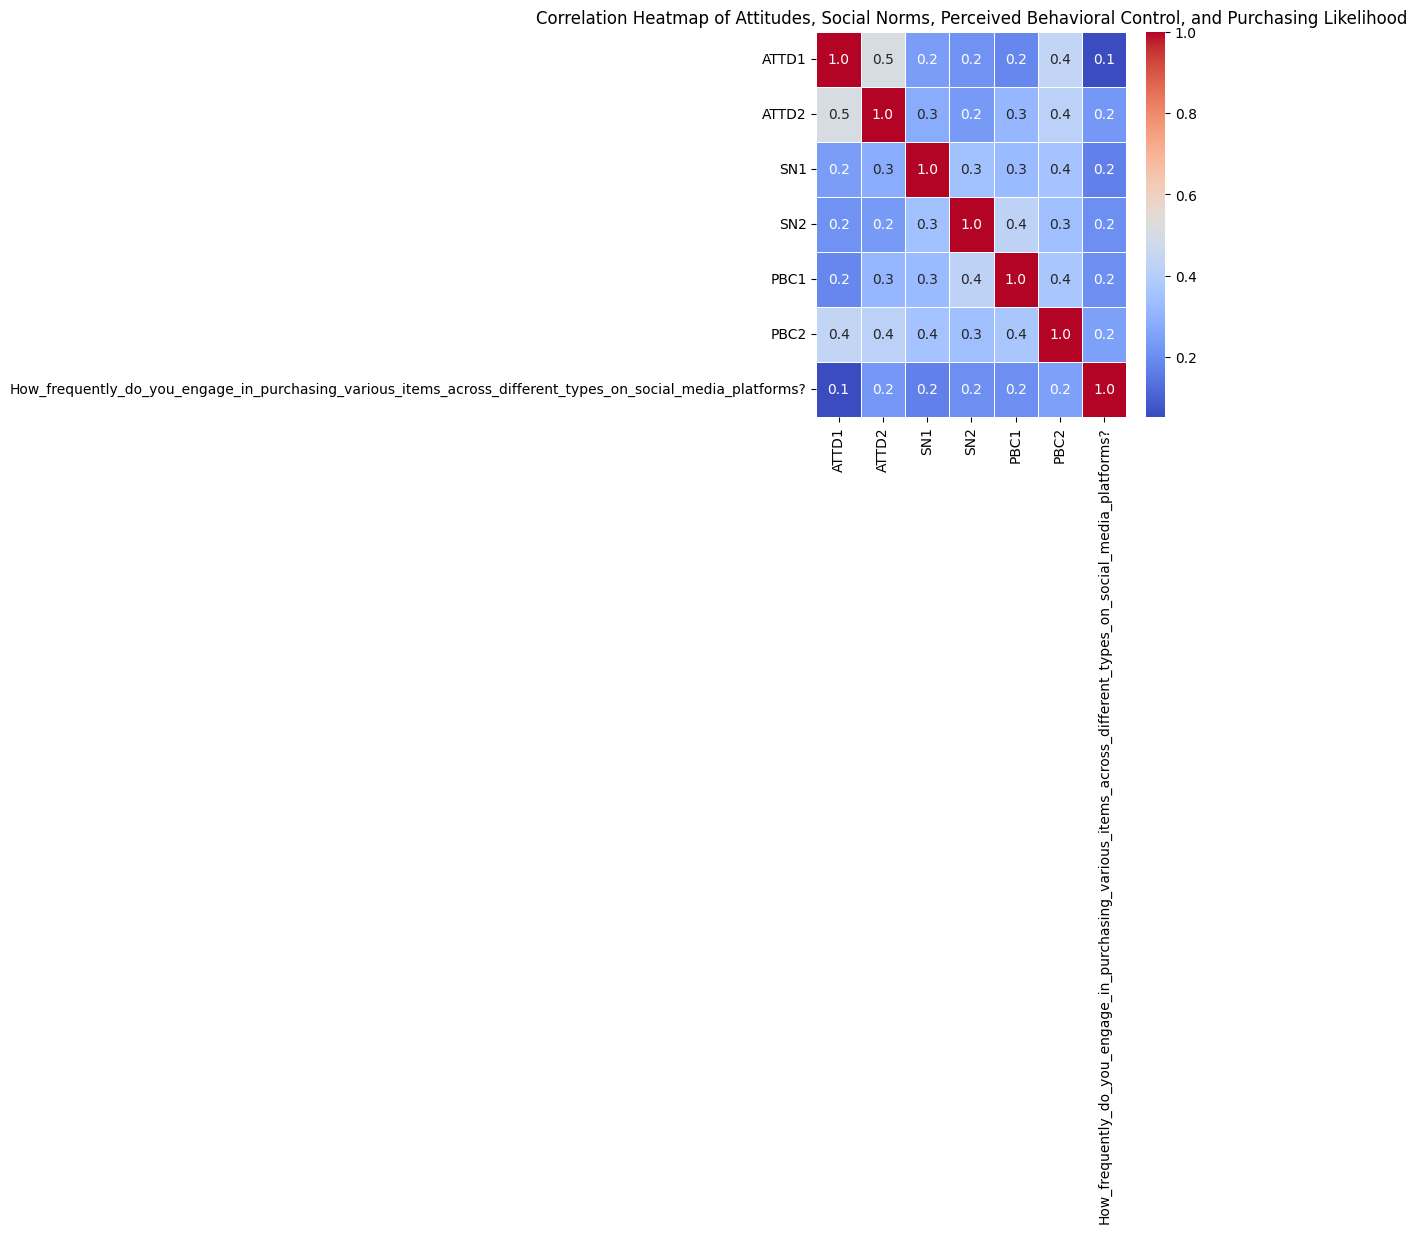

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculating correlation between variables
correlation_matrix = df_selected.corr()

# Plotting the correlation heatmap
plt.figure(figsize=(5, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.1f', cbar=True, linewidths=0.4)
plt.title('Correlation Heatmap of Attitudes, Social Norms, Perceived Behavioral Control, and Purchasing Likelihood')
plt.show()


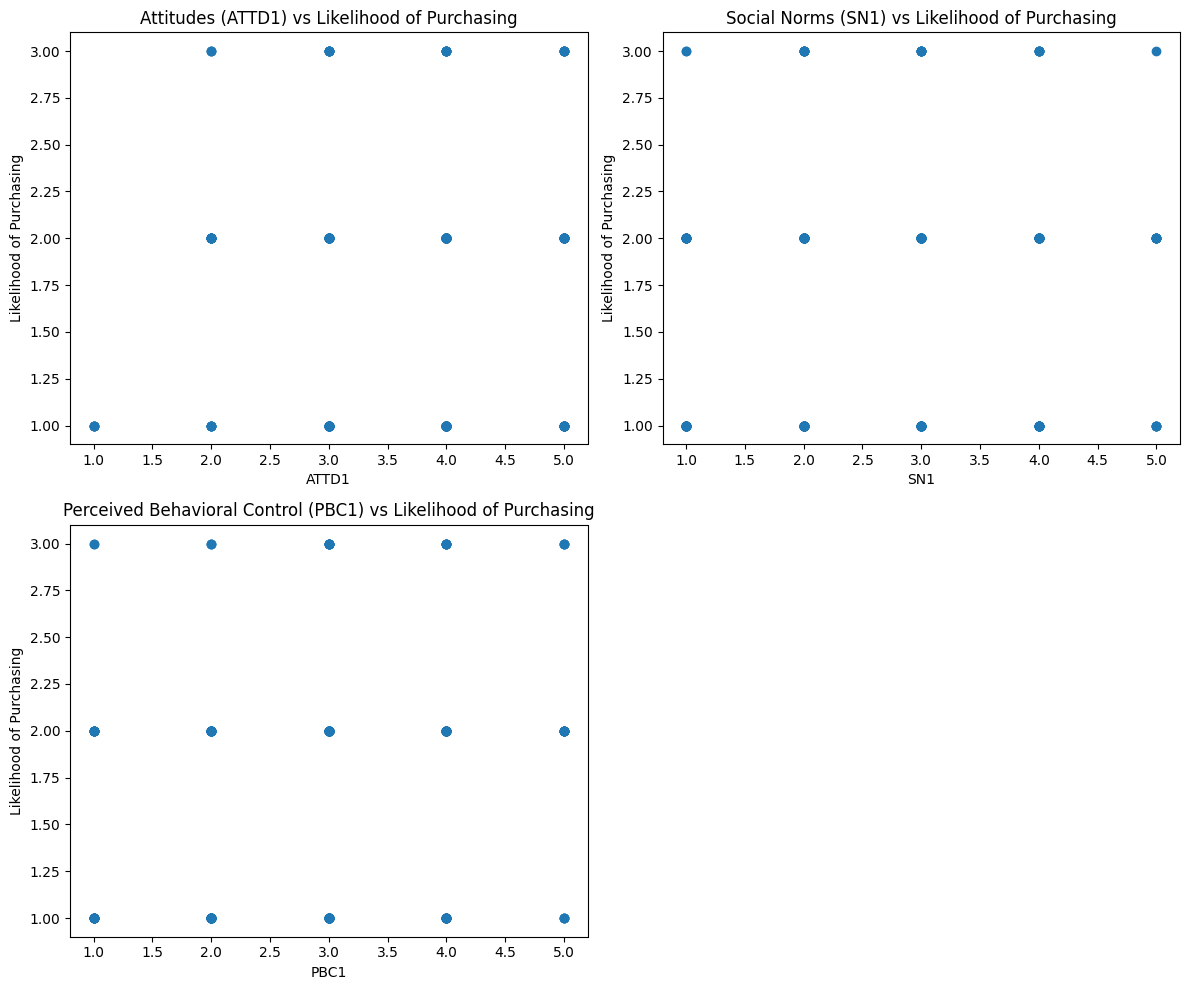

In [ ]:
# Plotting scatter plots for each factor against the likelihood of purchasing
plt.figure(figsize=(12, 10))

# Scatter plot for Attitudes vs Likelihood of Purchasing
plt.subplot(2, 2, 1)
# Using the correct, shortened column name 'ATTD1'
plt.scatter(df_selected['ATTD1'],
            df_selected['How_frequently_do_you_engage_in_purchasing_various_items_across_different_types_on_social_media_platforms?'])
plt.title('Attitudes (ATTD1) vs Likelihood of Purchasing')
plt.xlabel('ATTD1')
plt.ylabel('Likelihood of Purchasing')

# Scatter plot for Social Norms vs Likelihood of Purchasing
plt.subplot(2, 2, 2)
# Using the correct, shortened column name 'SN1'
plt.scatter(df_selected['SN1'],
            df_selected['How_frequently_do_you_engage_in_purchasing_various_items_across_different_types_on_social_media_platforms?'])
plt.title('Social Norms (SN1) vs Likelihood of Purchasing')
plt.xlabel('SN1')
plt.ylabel('Likelihood of Purchasing')

# Scatter plot for Perceived Behavioral Control vs Likelihood of Purchasing
plt.subplot(2, 2, 3)
# Using the correct, shortened column name 'PBC1'
plt.scatter(df_selected['PBC1'],
            df_selected['How_frequently_do_you_engage_in_purchasing_various_items_across_different_types_on_social_media_platforms?'])
plt.title('Perceived Behavioral Control (PBC1) vs Likelihood of Purchasing')
plt.xlabel('PBC1')
plt.ylabel('Likelihood of Purchasing')

plt.tight_layout()
plt.show()


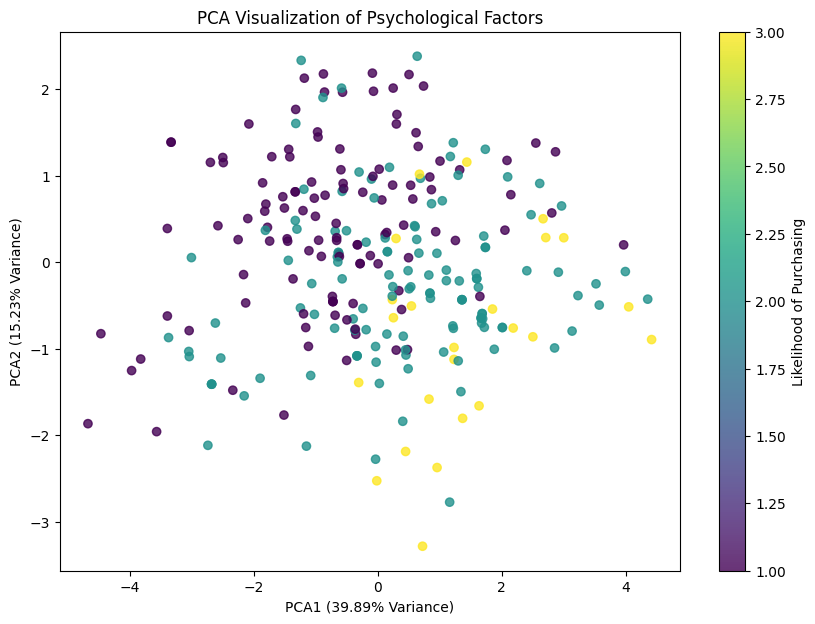

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

# Selecting only numerical columns for PCA
# Corrected pca_columns to match the actual shortened column names in df_selected
pca_columns = [
    'ATTD1',
    'ATTD2',
    'SN1',
    'SN2',
    'PBC1',
    'PBC2',
    'How_frequently_do_you_engage_in_purchasing_various_items_across_different_types_on_social_media_platforms?'
]

# Standardizing the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected[pca_columns])

# Applying PCA
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
pca_result = pca.fit_transform(df_scaled)

# Variance explained by each principal component
explained_variance = pca.explained_variance_ratio_

# Creating a dataframe for the PCA result
pca_df = pd.DataFrame(pca_result, columns=['PCA1', 'PCA2'])
pca_df['Likelihood_of_Purchasing'] = df_selected[
    'How_frequently_do_you_engage_in_purchasing_various_items_across_different_types_on_social_media_platforms?'
]

# Visualizing the PCA result
plt.figure(figsize=(10, 7))
scatter = plt.scatter(
    pca_df['PCA1'],
    pca_df['PCA2'],
    c=pca_df['Likelihood_of_Purchasing'],
    cmap='viridis',
    alpha=0.8
)
plt.colorbar(scatter, label='Likelihood of Purchasing')
plt.title('PCA Visualization of Psychological Factors')
plt.xlabel(f'PCA1 ({explained_variance[0]*100:.2f}% Variance)')
plt.ylabel(f'PCA2 ({explained_variance[1]*100:.2f}% Variance)')
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


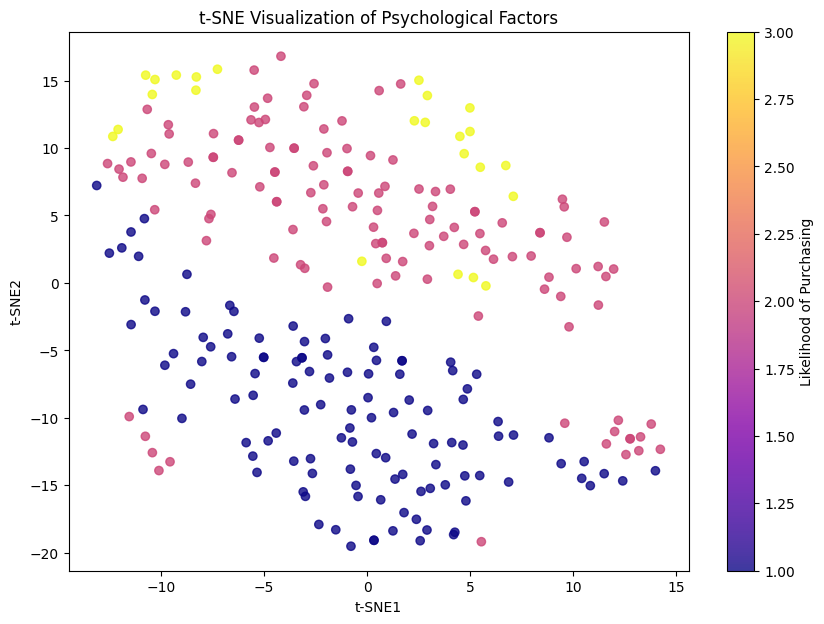

In [ ]:
from sklearn.manifold import TSNE

# Applying t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
tsne_result = tsne.fit_transform(df_scaled)

# Creating a dataframe for the t-SNE result
tsne_df = pd.DataFrame(tsne_result, columns=['t-SNE1', 't-SNE2'])
tsne_df['Likelihood_of_Purchasing'] = df_selected[
    'How_frequently_do_you_engage_in_purchasing_various_items_across_different_types_on_social_media_platforms?'
]

# Visualizing the t-SNE result
plt.figure(figsize=(10, 7))
scatter = plt.scatter(
    tsne_df['t-SNE1'],
    tsne_df['t-SNE2'],
    c=tsne_df['Likelihood_of_Purchasing'],
    cmap='plasma',
    alpha=0.8
)
plt.colorbar(scatter, label='Likelihood of Purchasing')
plt.title('t-SNE Visualization of Psychological Factors')
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')
plt.show()


In [ ]:
!pip install lifelines

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.7/115.7 kB 10.7 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=460e507f1ed02b1a2c3940e3391ad07b9ab238b0ecf0493a1944d0032fe9e20c
  Stored in directory: /root/.cache/pip/wheels/8b/67/f4/2caaae2146198dcb824f31a303833b07b14a5ec863fb3acd7b
Successfully built autograd-gamma


<ipython-input-13-2604a64c660b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['time_to_event'] = 6 - df_selected['How_frequently_do_you_engage_in_purchasing_various_items_across_different_types_on_social_media_platforms?']
<ipython-input-13-2604a64c660b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['event'] = np.where(


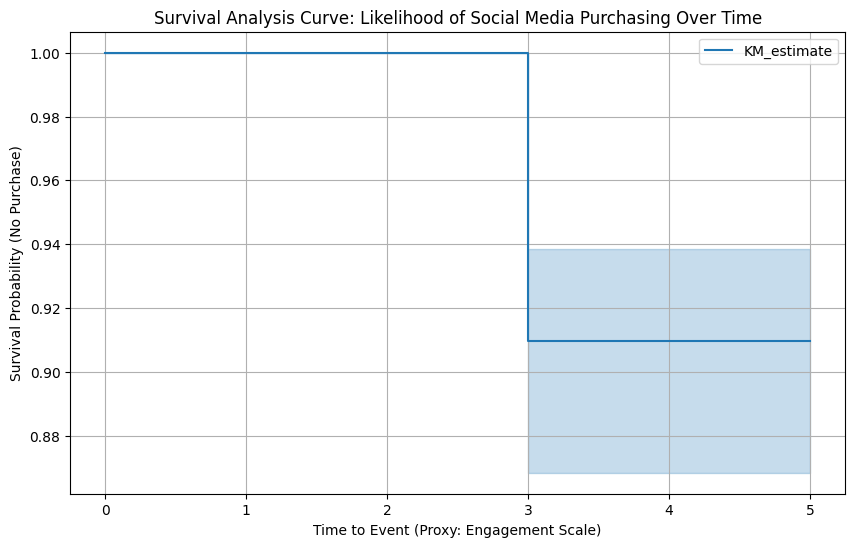

In [ ]:
# Ensure that the lifelines package is installed and that the previous cell
# with the !pip install command is run in the same kernel that this cell is run in
!pip install lifelines
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt
import numpy as np

# Creating a proxy for 'time to event' using likelihood of purchasing
df_selected['time_to_event'] = 6 - df_selected['How_frequently_do_you_engage_in_purchasing_various_items_across_different_types_on_social_media_platforms?']
df_selected['event'] = np.where(
    df_selected['How_frequently_do_you_engage_in_purchasing_various_items_across_different_types_on_social_media_platforms?'] > 2,
    1,  # Event occurred (purchased)
    0   # Event did not occur (no purchase)
)

# Kaplan-Meier Survival Analysis
kmf = KaplanMeierFitter()

# Fit the model to the data
kmf.fit(durations=df_selected['time_to_event'], event_observed=df_selected['event'])

# Plot the survival curve
plt.figure(figsize=(10, 6))
kmf.plot_survival_function()
plt.title('Survival Analysis Curve: Likelihood of Social Media Purchasing Over Time')
plt.xlabel('Time to Event (Proxy: Engagement Scale)')
plt.ylabel('Survival Probability (No Purchase)')
plt.grid(True)
plt.show()


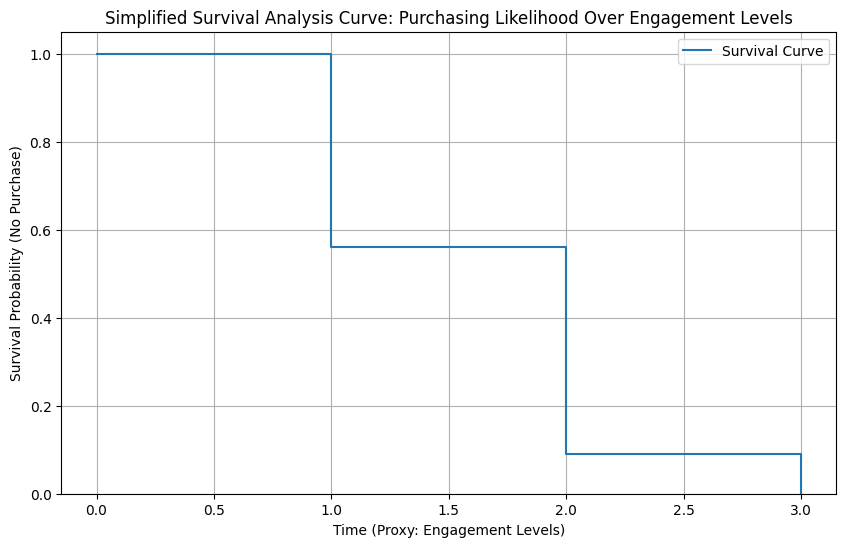

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Count occurrences of purchasing likelihood scores
event_counts = df_selected['How_frequently_do_you_engage_in_purchasing_various_items_across_different_types_on_social_media_platforms?'].value_counts().sort_index()

# Calculate survival probabilities as cumulative fractions of non-purchase events
cumulative_non_purchase = 1 - event_counts.cumsum() / event_counts.sum()

# Add an initial survival probability of 1 (no events at time 0)
time = np.arange(0, len(cumulative_non_purchase) + 1)  # Time proxy (engagement levels)
survival_probabilities = np.insert(cumulative_non_purchase.values, 0, 1)

# Plotting the simplified survival curve
plt.figure(figsize=(10, 6))
plt.step(time, survival_probabilities, where="post", label="Survival Curve")
plt.title('Simplified Survival Analysis Curve: Purchasing Likelihood Over Engagement Levels')
plt.xlabel('Time (Proxy: Engagement Levels)')
plt.ylabel('Survival Probability (No Purchase)')
plt.ylim(0, 1.05)
plt.grid(True)
plt.legend()
plt.show()


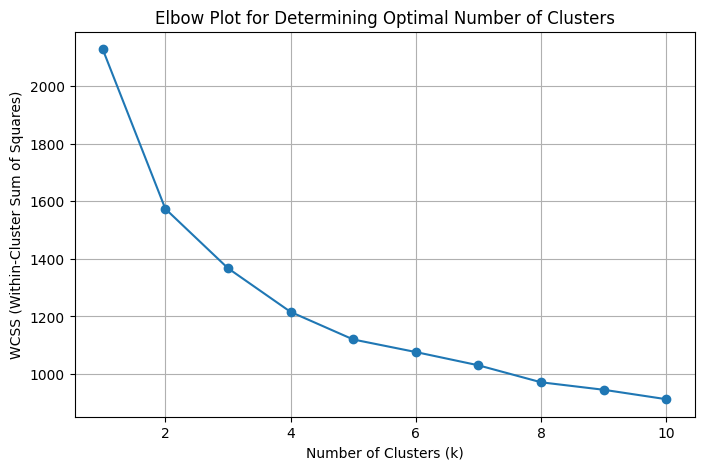

In [ ]:
# Importing necessary libraries for clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import numpy as np
from scipy.spatial import Voronoi, voronoi_plot_2d
import pandas as pd

# For visualization
from mpl_toolkits.mplot3d import Axes3D

# Selecting numerical columns for clustering
clustering_data = df_selected.iloc[:, :-1]  # Excluding the purchasing likelihood column

# Step 1: Standardizing the data for clustering
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
clustering_data_scaled = scaler.fit_transform(clustering_data)

# Step 2: Using the Elbow Method to determine the optimal number of clusters
wcss = []  # Within-cluster sum of squares
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(clustering_data_scaled)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Plot
plt.figure(figsize=(8, 5))
plt.plot(k_range, wcss, marker='o')
plt.title('Elbow Plot for Determining Optimal Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.grid()
plt.show()


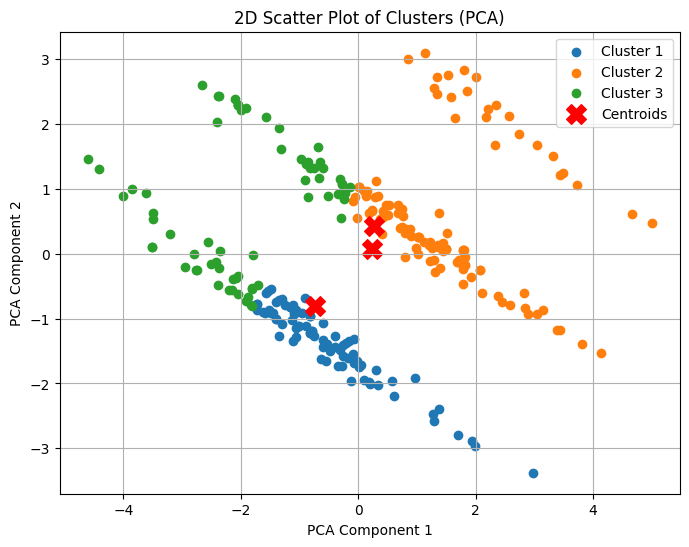

In [ ]:
# Step 3: Applying K-Means Clustering with 3 clusters
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(clustering_data_scaled)

# Adding cluster labels to the dataset
# Get column names from the original clustering_data DataFrame
columns_for_clustering = clustering_data.columns
clustering_data_with_clusters = pd.DataFrame(clustering_data_scaled, columns=columns_for_clustering)
clustering_data_with_clusters['Cluster'] = clusters

# Step 4: Visualizing the Clusters in 2D using PCA
pca = PCA(n_components=2)  # Reducing dimensions to 2 for visualization
pca_result = pca.fit_transform(clustering_data_scaled)

# Creating a scatter plot of the clusters in 2D
plt.figure(figsize=(8, 6))
for cluster in range(optimal_k):
    plt.scatter(
        pca_result[clusters == cluster, 0],
        pca_result[clusters == cluster, 1],
        label=f"Cluster {cluster + 1}"
    )
plt.scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
    s=200, c='red', label='Centroids', marker='X'
)
plt.title('2D Scatter Plot of Clusters (PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.grid()
plt.show()


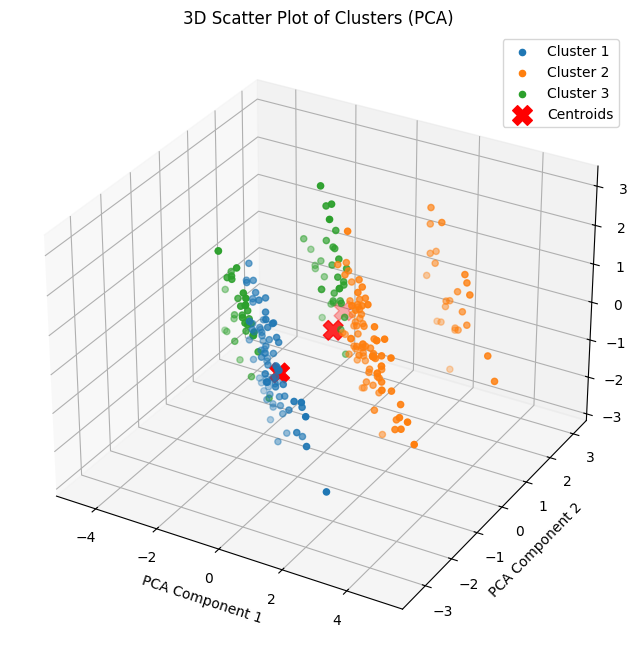

In [ ]:
# Step 5: Visualizing the Clusters in 3D using PCA
pca_3d = PCA(n_components=3)  # Reducing dimensions to 3 for visualization
pca_result_3d = pca_3d.fit_transform(clustering_data_scaled)

# Creating a 3D Scatter Plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for cluster in range(optimal_k):
    ax.scatter(
        pca_result_3d[clusters == cluster, 0],
        pca_result_3d[clusters == cluster, 1],
        pca_result_3d[clusters == cluster, 2],
        label=f"Cluster {cluster + 1}"
    )

ax.scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2],
    s=200, c='red', label='Centroids', marker='X'
)

ax.set_title('3D Scatter Plot of Clusters (PCA)')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
ax.legend()
plt.show()


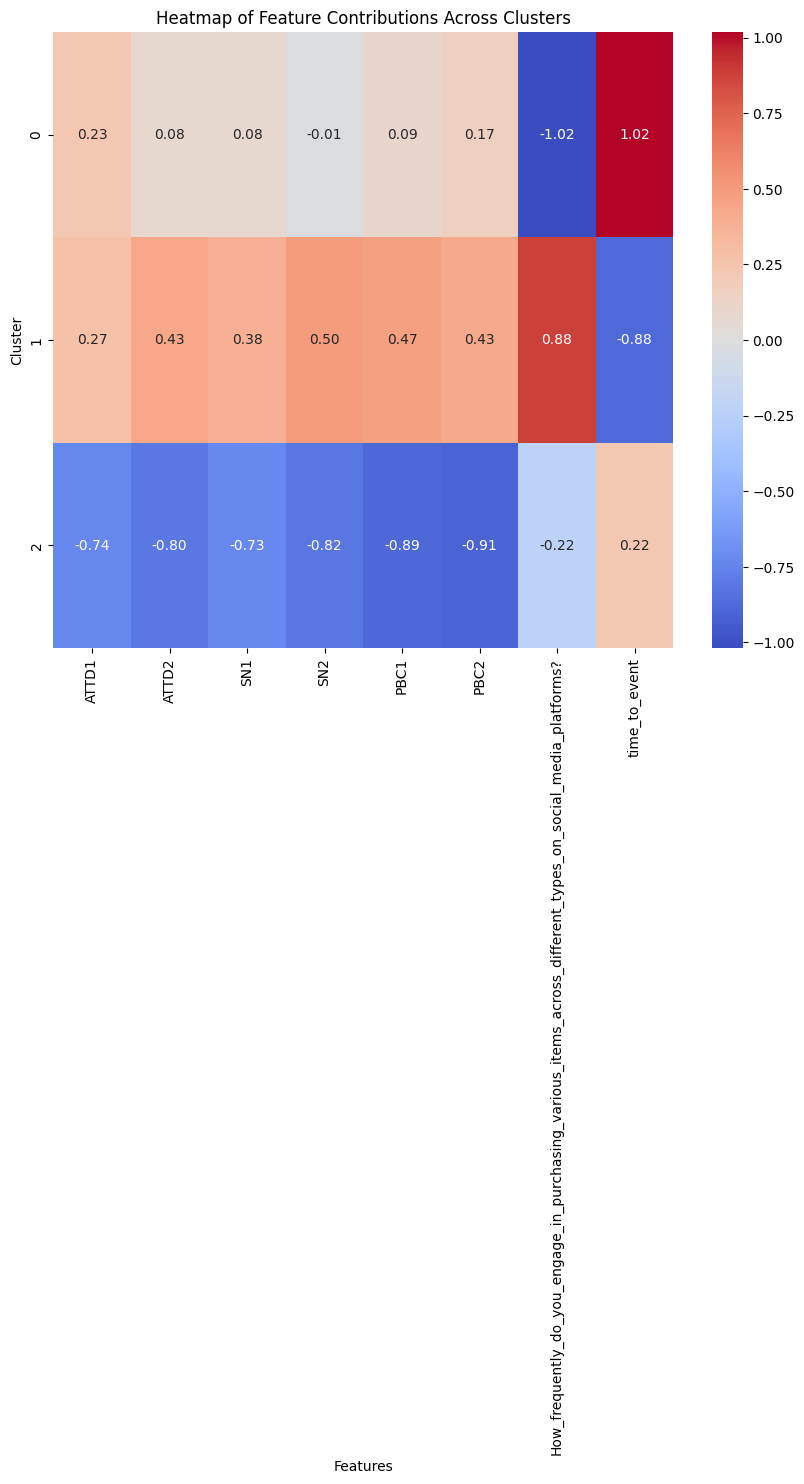

In [ ]:
# Step 7: Creating a Heatmap to Analyze Feature Contributions Across Clusters
# Aggregating feature values by cluster (mean)
# Selecting only numerical features for the heatmap
clustering_data_with_clusters_numeric = clustering_data_with_clusters.select_dtypes(include=np.number)

cluster_means = clustering_data_with_clusters_numeric.groupby('Cluster').mean()

# Creating a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cluster_means, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap of Feature Contributions Across Clusters")
plt.xlabel("Features")
plt.ylabel("Cluster")
plt.show()


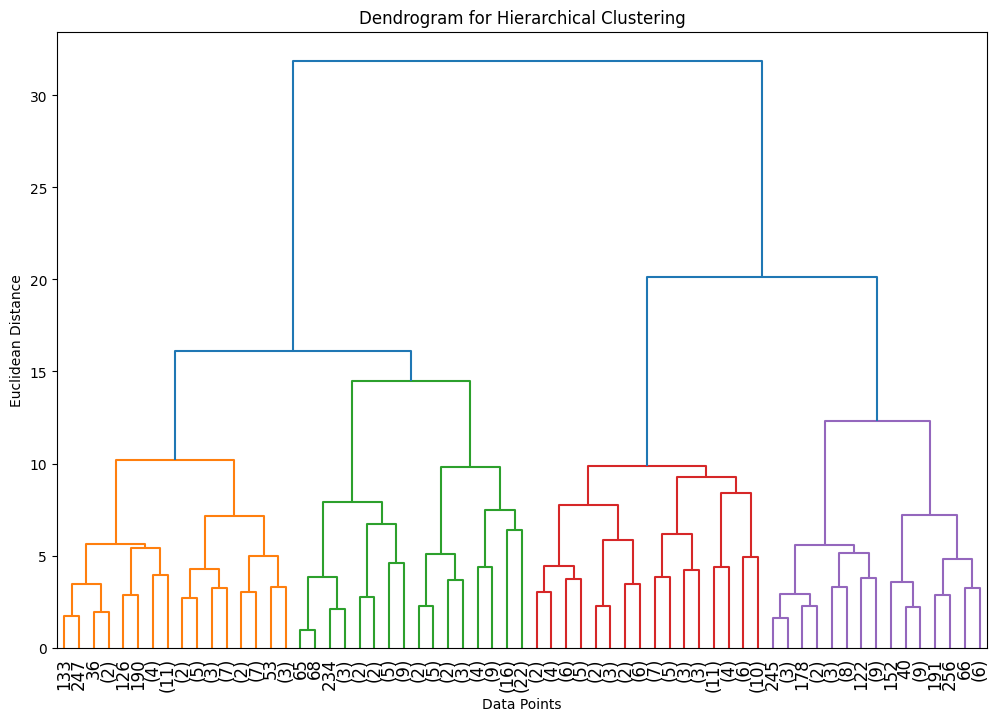

In [ ]:
# Step 8: Creating a Dendrogram for Hierarchical Clustering
# Using hierarchical clustering to analyze cluster relationships
hierarchical_linkage = linkage(clustering_data_scaled, method='ward')

# Plotting the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(hierarchical_linkage, truncate_mode='level', p=5, color_threshold=15,
           leaf_rotation=90, leaf_font_size=12)
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:1113: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  self._figure.tight_layout(**tight_params)


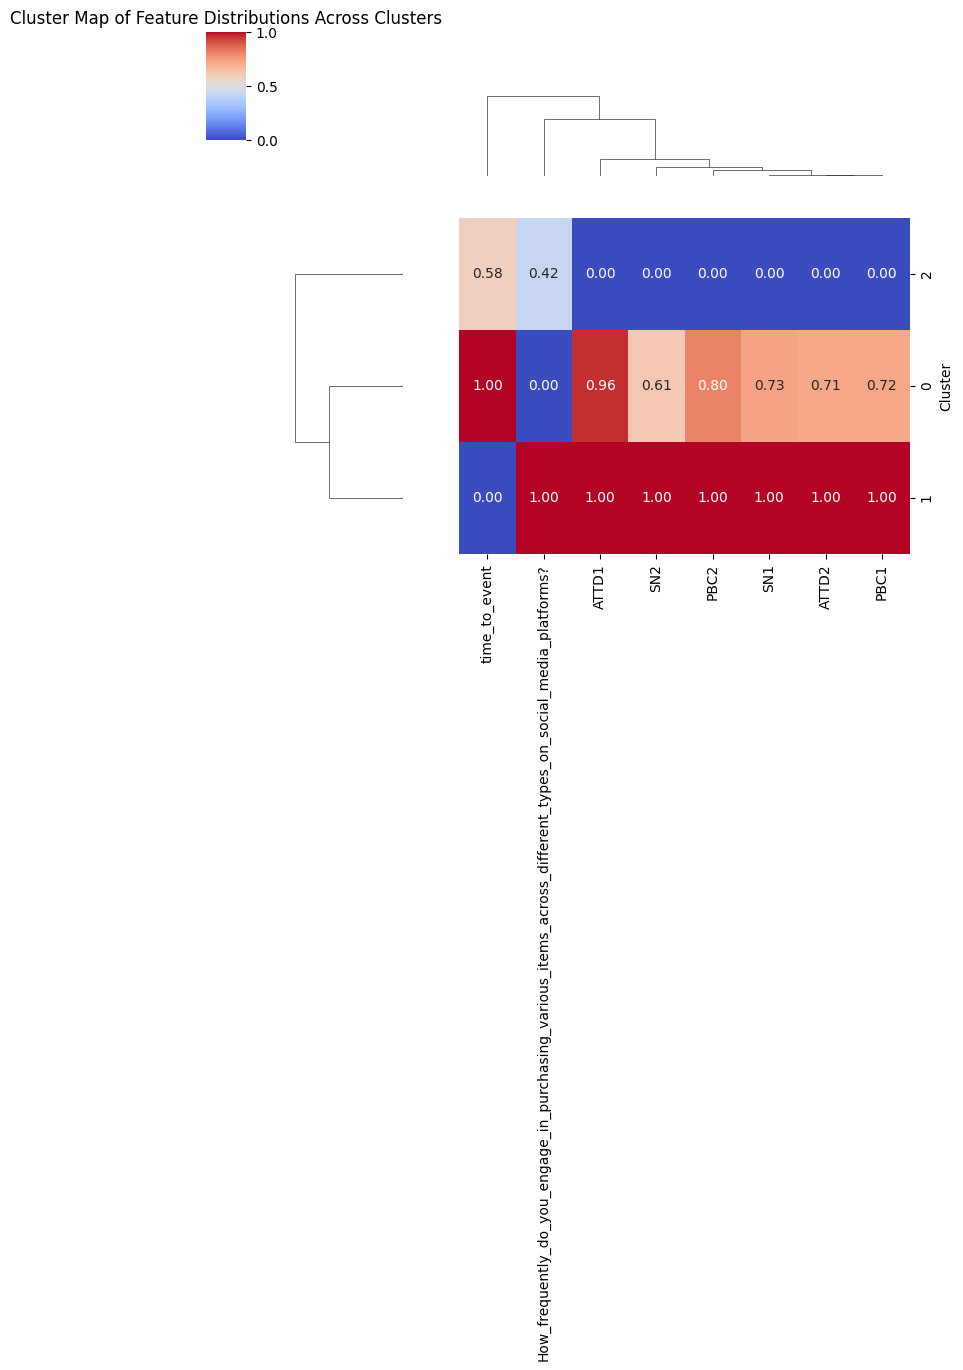

In [ ]:
# Regenerating the Cluster Map with optimized size
sns.clustermap(
    cluster_means,
    cmap="coolwarm",
    annot=True,
    fmt=".2f",
    figsize=(8, 6),
    standard_scale=1
)
plt.title("Cluster Map of Feature Distributions Across Clusters")
plt.show()



/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


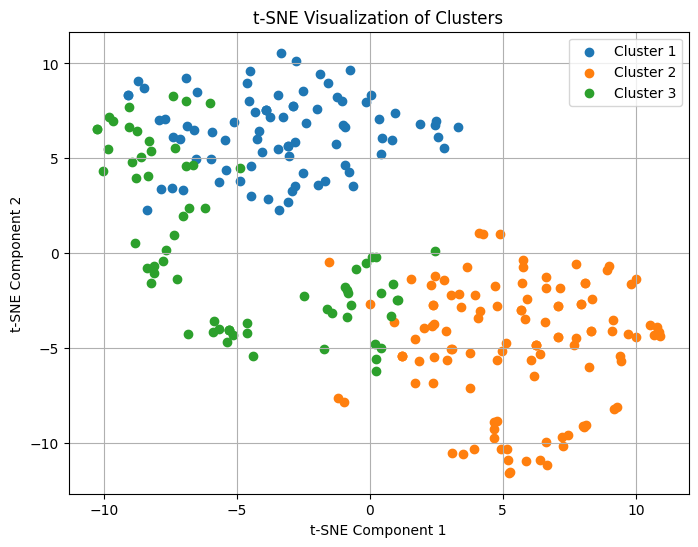

In [ ]:
# Step 10: Creating a t-SNE Visualization for the Clusters
# Using t-SNE to reduce data to 2 dimensions for visualization
tsne = TSNE(n_components=2, perplexity=30, random_state=42, n_iter=300)
tsne_result = tsne.fit_transform(clustering_data_scaled)

# Creating a scatter plot for t-SNE visualization
plt.figure(figsize=(8, 6))
for cluster in range(optimal_k):
    plt.scatter(
        tsne_result[clusters == cluster, 0],
        tsne_result[clusters == cluster, 1],
        label=f"Cluster {cluster + 1}"
    )
plt.title('t-SNE Visualization of Clusters')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.grid()
plt.show()


<Figure size 1000x800 with 0 Axes>

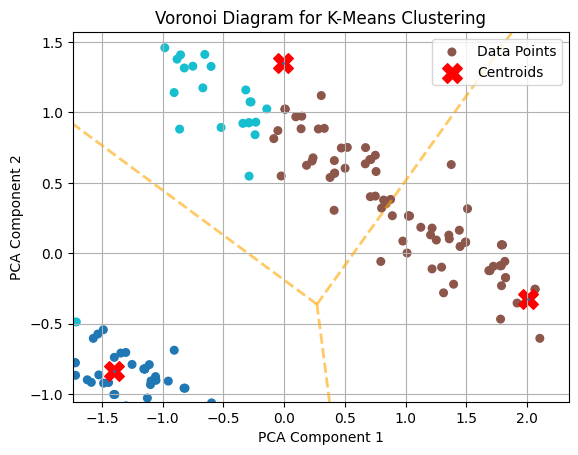

In [ ]:
# Step 11: Creating a Voronoi Diagram for K-Means Clusters
from scipy.spatial import Voronoi, voronoi_plot_2d

# Reducing to 2 dimensions for Voronoi Diagram (using PCA)
pca_voronoi = PCA(n_components=2)
data_2d = pca_voronoi.fit_transform(clustering_data_scaled)

# Using K-Means centroids as Voronoi points
kmeans_voronoi = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_voronoi.fit(data_2d)
vor = Voronoi(kmeans_voronoi.cluster_centers_)

# Plotting the Voronoi diagram
plt.figure(figsize=(10, 8))
voronoi_plot_2d(vor, show_vertices=False, line_colors='orange', line_width=2, line_alpha=0.6, point_size=2)

# Scatter plot of data points with cluster labels
plt.scatter(data_2d[:, 0], data_2d[:, 1], c=clusters, cmap='tab10', s=30, label='Data Points')
plt.scatter(kmeans_voronoi.cluster_centers_[:, 0], kmeans_voronoi.cluster_centers_[:, 1],
            c='red', marker='X', s=200, label='Centroids')

plt.title('Voronoi Diagram for K-Means Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.grid()
plt.show()


In [ ]:
import pandas as pd

# Reloading the dataset after the environment reset
# Update the file_path to the correct location of your Excel file.
file_path = '/content/Dataset.xlsx'  # This was the file path in the original code provided
data = pd.ExcelFile(file_path).parse('Sheet1')

# Preparing demographic variables for structured table output
demographic_summary = []

# Gender
gender_data = data['Gender'].value_counts().reset_index()
gender_data.columns = ['Category', 'Frequency']
gender_data['Demographic'] = 'Gender'
gender_data['Percentage (%)'] = (gender_data['Frequency'] / data.shape[0]) * 100
demographic_summary.append(gender_data)

# Define age categories and calculate age summary
age_bins = [16, 22, 28, 34, 40]
age_labels = ['17-22', '23-28', '29-34', '35-40']
data['Age Category'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels, right=True)
age_summary = data['Age Category'].value_counts().reset_index()
age_summary.columns = ['Category', 'Frequency']
age_summary['Percentage (%)'] = (age_summary['Frequency'] / data.shape[0]) * 100

# Adding "Others" category for age
others_count = data['Age'][~data['Age'].between(17, 40, inclusive='both')].count()
others_percentage = (others_count / data.shape[0]) * 100
if others_count > 0:
    # Instead of append, use pd.concat to add a new row
    age_summary = pd.concat([age_summary, pd.DataFrame([{
        'Category': 'Others',
        'Frequency': others_count,
        'Percentage (%)': others_percentage
    }])], ignore_index=True)
age_summary['Demographic'] = 'Age'
demographic_summary.append(age_summary)

# Division
division_data = data['Division in Bangladesh you are based in:'].value_counts().reset_index()
division_data.columns = ['Category', 'Frequency']
division_data['Demographic'] = 'Division'
division_data['Percentage (%)'] = (division_data['Frequency'] / data.shape[0]) * 100
demographic_summary.append(division_data)

# Occupations
occupation_data = data['Occupation:'].value_counts().reset_index()
occupation_data.columns = ['Category', 'Frequency']
occupation_data['Demographic'] = 'Occupations'
occupation_data['Percentage (%)'] = (occupation_data['Frequency'] / data.shape[0]) * 100
demographic_summary.append(occupation_data)

# Monthly Income
income_data = data['Monthly income range:'].value_counts().reset_index()
income_data.columns = ['Category', 'Frequency']
income_data['Demographic'] = 'Annual Income'
income_data['Percentage (%)'] = (income_data['Frequency'] / data.shape[0]) * 100
demographic_summary.append(income_data)

# Combine all summaries into a single DataFrame
final_summary = pd.concat(demographic_summary, ignore_index=True)
final_summary = final_summary[['Demographic', 'Category', 'Frequency', 'Percentage (%)']].sort_values(
    by=['Demographic', 'Category']
)

# Display the formatted table to the user
# Instead of using 'ace_tools', we can use the display function from IPython.display
from IPython.display import display

display(final_summary)



,Demographic,Category,Frequency,Percentage (%)
3,Age,17-22,145,54.511278
4,Age,23-28,101,37.969925
6,Age,29-34,4,1.503759
5,Age,35-40,7,2.631579
7,Age,Others,9,3.383459
25,Annual Income,"BDT 100,001- BDT 150,000",8,3.007519
23,Annual Income,"BDT 25,001- BDT 50,000",30,11.278195
24,Annual Income,"BDT 50,001- BDT 75,000",10,3.759398
27,Annual Income,"BDT 75,001- BDT 100,0000",6,2.255639
22,Annual Income,"Less than BDT 25,000",205,77.067669


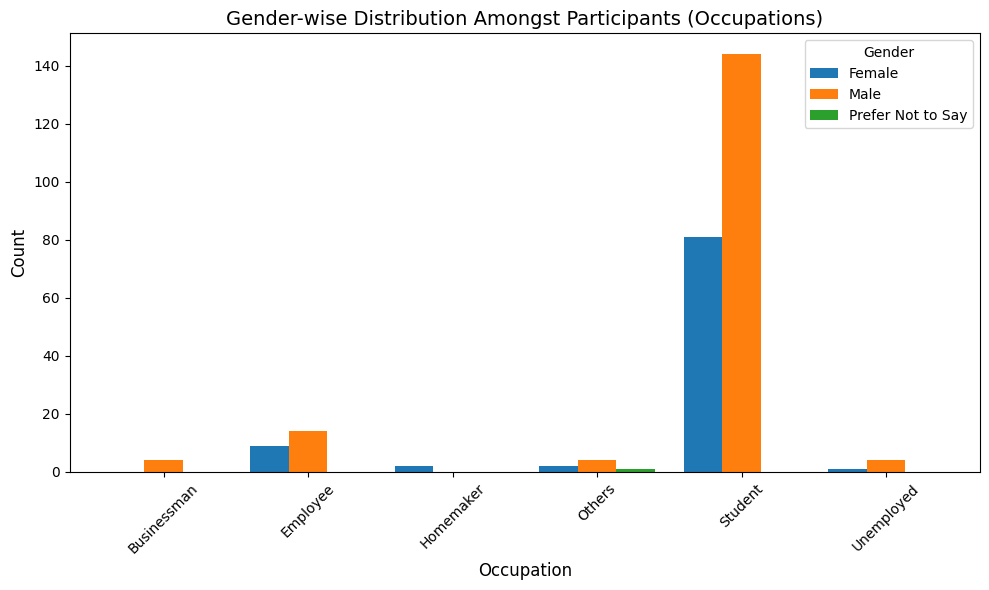

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your data is in a pandas DataFrame called 'data'
# and the columns are named 'Occupation:' and 'Gender'

# Group data by occupation and gender, then count occurrences
gender_occupation_group = data.groupby(['Occupation:', 'Gender']).size().unstack(fill_value=0)

# Create the grouped bar chart
gender_occupation_group.plot(kind='bar', figsize=(10, 6), width=0.8)
plt.title("Gender-wise Distribution Amongst Participants (Occupations)", fontsize=14)
plt.xlabel("Occupation", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45, fontsize=10)  # Rotate x-axis labels for better readability
plt.legend(title="Gender", fontsize=10)
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

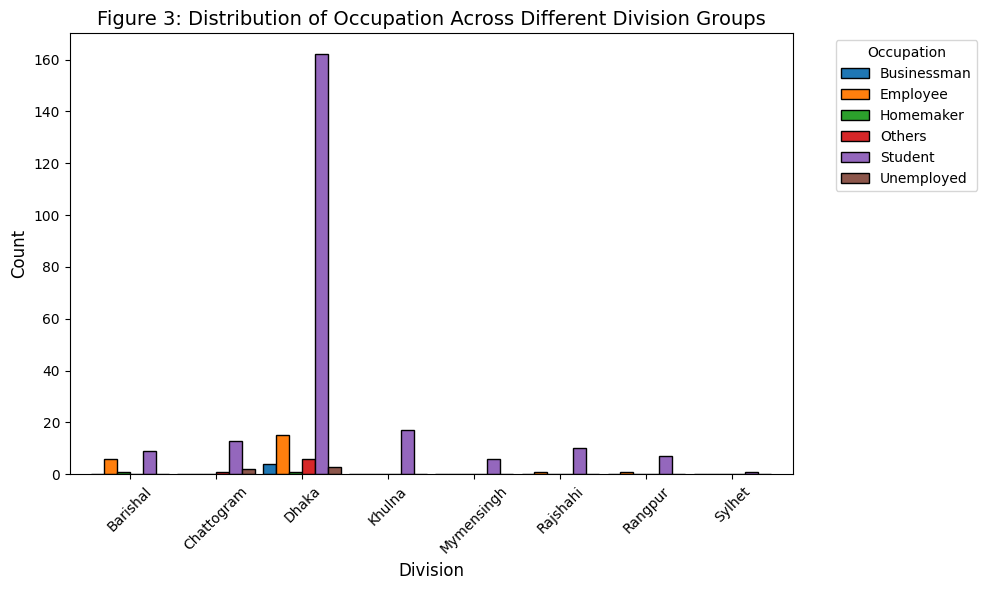

In [ ]:
# Creating a grouped bar chart (similar to the uploaded style)
# Grouping data for Division and occupation
import pandas as pd # Importing the pandas library with the alias 'pd'
import matplotlib.pyplot as plt # Importing matplotlib.pyplot for plotting



# Calculate division_occupation_group
division_occupation_group = data.groupby(['Division in Bangladesh you are based in:', 'Occupation:']).size().unstack(fill_value=0)

division_occupation_group.plot(kind='bar', figsize=(10, 6), width=0.9, edgecolor='black')
plt.title("Figure 3: Distribution of Occupation Across Different Division Groups", fontsize=14)
plt.xlabel("Division", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.legend(title="Occupation", fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
!pip install lime
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from lime.lime_tabular import LimeTabularExplainer
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder



# Convert 'Timestamp' column to numerical representation (e.g., Unix timestamp)
data['Timestamp'] = pd.to_numeric(pd.to_datetime(data['Timestamp']))

# Identify categorical columns and apply Label Encoding
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

# Check actual column names in your DataFrame
print(data.columns)

# Adjust the column name for dropping if needed, for example:
X = data.drop(columns=["How frequently do you engage in purchasing various items across different types on social media platforms?"])
# or
# X = data.drop(columns=['Purchase_Likelihood'])  # If the column name is 'Purchase_Likelihood'

y = data["How frequently do you engage in purchasing various items across different types on social media platforms?"]
# or
# y = data['Purchase_Likelihood']  # If the column name is 'Purchase_Likelihood'


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Initialize LIME explainer
explainer = LimeTabularExplainer(
    training_data=X_train.values,
    feature_names=X_train.columns,
    class_names=model.classes_,
    mode="classification"
)

# Select instances for explanation
# Make sure these selections are valid after Label Encoding
case_low_low = X_test[(y_test == y_test.unique()[0]) & (model.predict(X_test) == y_test.unique()[0])].iloc[0] # Assuming "Low" is the first unique value in y_test
case_low_high = X_test[(y_test == y_test.unique()[0]) & (model.predict(X_test) != y_test.unique()[0])].iloc[0] # Assuming "Low" is the first unique value in y_test

# Generate LIME explanations
explanation_low_low = explainer.explain_instance(
    data_row=case_low_low.values,
    predict_fn=model.predict_proba
)
explanation_low_high = explainer.explain_instance(
    data_row=case_low_high.values,
    predict_fn=model.predict_proba
)

# Visualize explanations
fig1 = explanation_low_low.as_pyplot_figure()
plt.title("Actual: LOW, Predicted: LOW")
plt.show()



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 12.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=4eecde79ddb12ac44f04445063488bd042c9c042a5f51eea21cba75c6e5f1e62
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime
Index(['Timestamp',
       'Do you consent to participate in this survey? Link to the consent forms available in both English & Bengali.',
       'Gender', 'Age', 'Division in Bangladesh you are based in:',
       'Occupation:', 'Monthly income range:',
       'How active are you on social media?',
       'How frequently do you engage in purchasing various items across different types on social media platforms?',
       'How much of your monthly income you spend on purchases on social media?',
       'On average, how many hours do you spend on the internet per week (out of 168 hours)?',
  

ValueError: could not convert string to float: '23-28'